In [6]:
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for advanced data visualization
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification
from sklearn.metrics import accuracy_score  # Function to calculate accuracy score
# Importing LightGBM library
import lightgbm as lgb

In [7]:
data = pd.read_csv(r'C:\Users\manoj\SMcric\matches.csv')
data.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [8]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team1.replace({'Kings XI Punjab': 'Punjab Kings'}, regex=True, inplace=True)
data.team2.replace({'Kings XI Punjab': 'Punjab Kings'}, regex=True, inplace=True)
data.winner.replace({'Kings XI Punjab': 'Punjab Kings'}, regex=True, inplace=True)
data.toss_winner.replace({'Kings XI Punjab': 'Punjab Kings'}, regex=True, inplace=True)

data.team1.replace({'Gujarat Lions': 'Gujarat Titans'}, regex=True, inplace=True)
data.team2.replace({'Gujarat Lions': 'Gujarat Titans'}, regex=True, inplace=True)
data.winner.replace({'Gujarat Lions': 'Gujarat Titans'}, regex=True, inplace=True)
data.toss_winner.replace({'Gujarat Lions': 'Gujarat Titans'}, regex=True, inplace=True)
data.team1.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.team2.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.winner.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.toss_winner.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_4788\2263255386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
C:\Users\manoj\AppData\Local\Temp\ipykernel_4788\2263255386.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [9]:
(data['team1'].unique())

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiant', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [10]:
data.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [11]:
data['city'].fillna('Unknown', inplace=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_4788\286718872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['city'].fillna('Unknown', inplace=True)


In [12]:
cols_to_fill = ['player_of_match', 'target_runs', 'target_overs','toss_decision','winner']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')

In [13]:
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the 'date' column and create a new 'season' column
data['season'] = pd.DatetimeIndex(data['date']).year

In [14]:
# Calculate the mean of the 'result_margin' column
mean_result_margin = data['result_margin'].mean()

# Fill missing values in 'result_margin' column with the mean
data['result_margin'].fillna(mean_result_margin, inplace=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_4788\1386551545.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['result_margin'].fillna(mean_result_margin, inplace=True)


In [15]:
data.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           0
target_overs          0
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [16]:
data=data[data['winner']!='Not Available']

In [17]:
data.drop(['id','method'],axis=1,inplace=True)

In [18]:
data.isnull().sum()

season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [19]:
len(data['city'].unique())

37

In [20]:
data.city.replace({'Bangalore': 'Bengaluru'}, regex=True, inplace=True)
data.city.replace({'Navi Mumbai': 'Mumbai'}, regex=True, inplace=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_4788\55546813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.city.replace({'Bangalore': 'Bengaluru'}, regex=True, inplace=True)


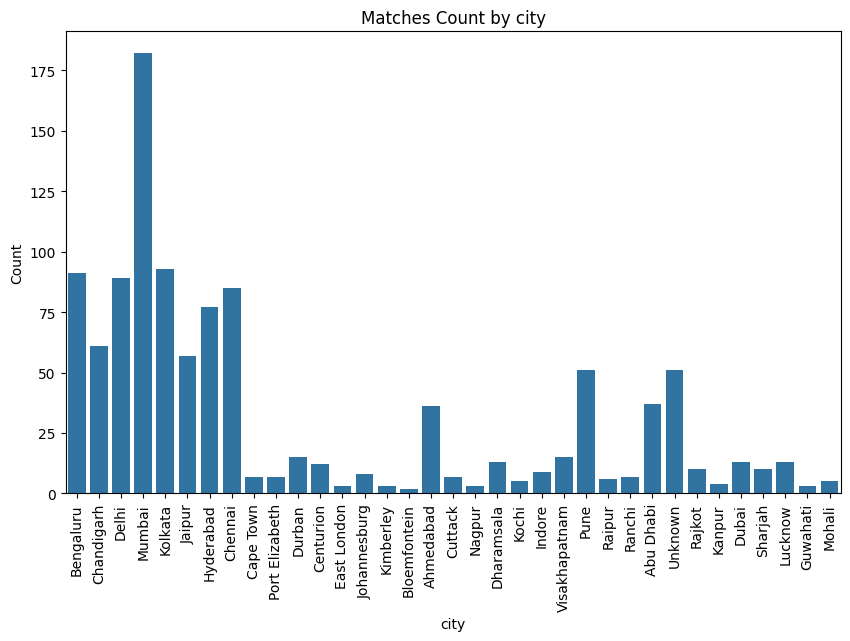

In [21]:
plt.figure(figsize=(10, 6))

# Use Seaborn's countplot to plot the number of matches played at each venue
# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='city', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('city')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by city')

# Display the plot
plt.show()

In [22]:
venue_counts = data['city'].value_counts().head(10)
print(venue_counts)

city
Mumbai        182
Kolkata        93
Bengaluru      91
Delhi          89
Chennai        85
Hyderabad      77
Chandigarh     61
Jaipur         57
Unknown        51
Pune           51
Name: count, dtype: int64


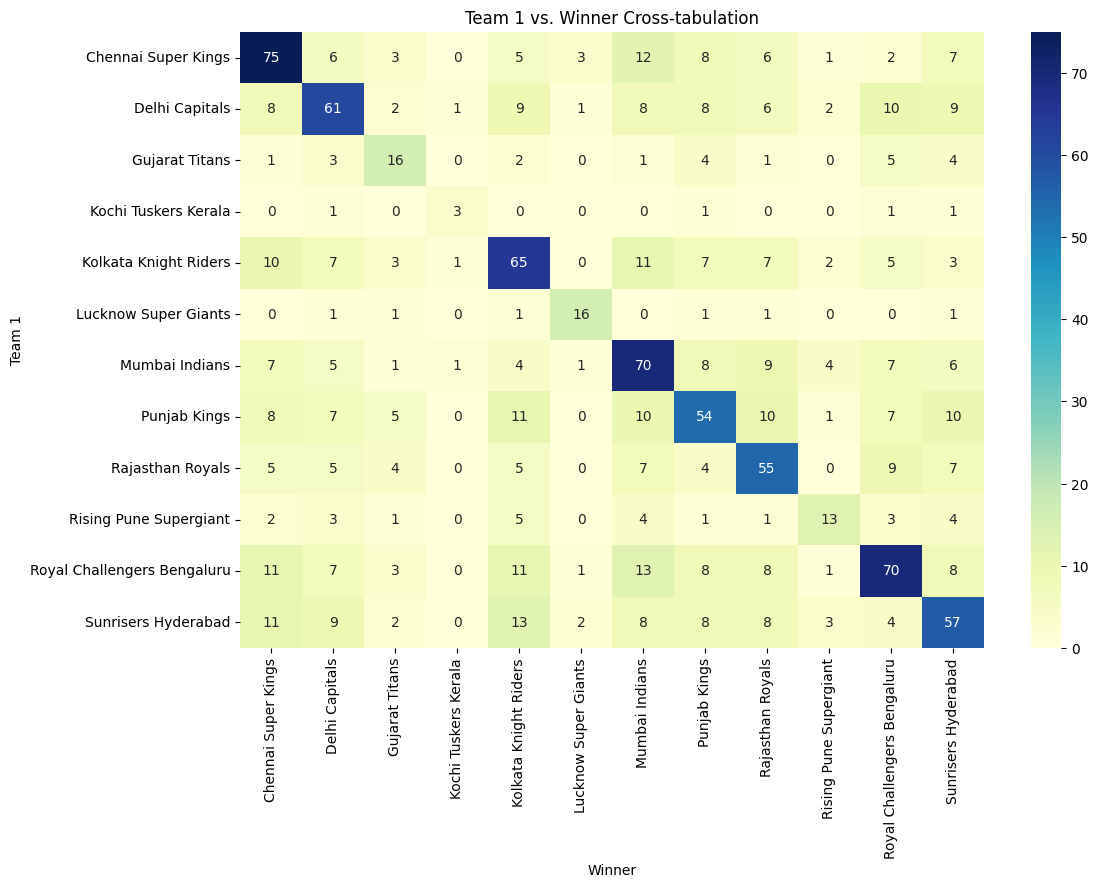

In [23]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['winner'])

# Plotting Heatmap for Cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Winner')
plt.ylabel('Team 1')
plt.title('Team 1 vs. Winner Cross-tabulation')
plt.show()

In [24]:
data.head(5)

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,2008,Bengaluru,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [25]:
data.head(5)

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,2008,Bengaluru,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [26]:
unwanted_columns = ['date','season','umpire1','umpire2','super_over','match_type']

# Drop the unwanted columns from the DataFrame
data.drop(columns=unwanted_columns, inplace=True)

In [27]:
data.head(5)

,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs
0,Bengaluru,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0
1,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0
2,Delhi,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0
3,Mumbai,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0
4,Kolkata,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0


In [28]:
data.columns

Index(['city', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs'],
      dtype='object')

In [29]:
data.head(5)

,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs
0,Bengaluru,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0
1,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0
2,Delhi,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0
3,Mumbai,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0
4,Kolkata,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0
